# Part II - Ford GoBike System Slide Deck
## by Bolu Okelola

## Investigation Overview

To draw insights from the data, I made use of the three (3) different levels of visualizations:

1. univariate, by the way of histograms (for numerical variables), pie charts, and bar charts (for qualitative factors)
2. bivariate, in form of scatter plots, clustered bar charts, and box plots to see the relationship between two sets of variables
3. multivariate plots, such as adapted heatmaps, clusterd bar charts and a correlation matrix



## Dataset Overview

This analysis was conducted on a dataset about a bike renting service (Ford GoBike) in the SanFranciso bay area. The users are split between Subscribers (committed riders) and Customers (occasional riders)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike=pd.read_csv("submission.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What ages take the most or least trips?

The histogram below is a right skewed, unimodal one:

1. The larger portion of the trips were taken by users within the middle ages (24-40), with the peak at 32 years
2. The older the users got, the less trips were taken using GoBikes

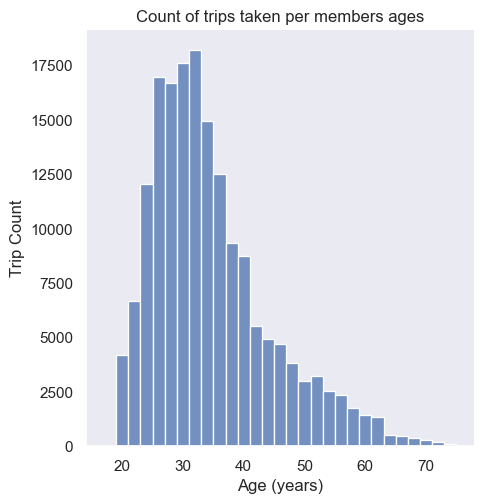

In [36]:
#setting the bins
bins=np.arange(17, gobike.member_age.max()+2, 2)
#plot the histogram
sns.set(rc = {'figure.figsize':(14,8)})
sns.displot(gobike.member_age, kind="hist", bins=bins);
plt.xlabel('Age (years)')
plt.grid(False)
plt.ylabel('Trip Count')
plt.title('Count of trips taken per members ages');

## What gender group are most users?

The pie chart below shows that there are more men (at 74.6%) represented in the data set, than any other gender

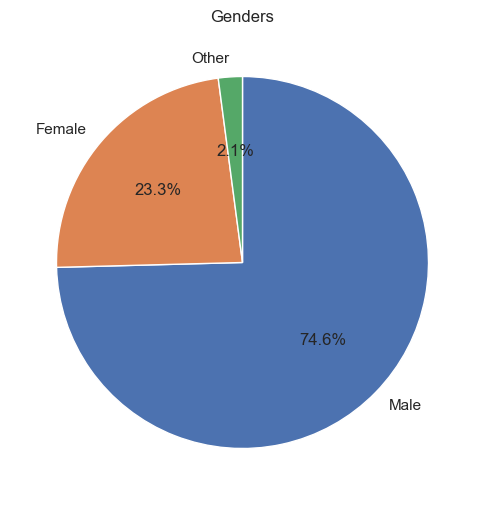

In [43]:
sns.set(rc = {'figure.figsize':(6,8)})
sorted_genders = gobike['member_gender'].value_counts()
plt.pie(sorted_genders, labels = ['Male', 'Female', 'Other'], startangle = 90, counterclock=False, autopct='%1.1f%%') 
plt.title('Genders');

## What is distribution of trips taken over the week?

There is a general upwards trend in the usage during the week, with the peak being on Thursdays, until the weekends where it drops by about 50%-55% 

In [5]:
#set the color and order
base_color=sns.color_palette()[0]
base_order = gobike.start_station_name.value_counts().head(50).index

# set the weekday variable
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
gobike['start_dayofweek'] = gobike['start_dayofweek'].astype(weekday_categ)

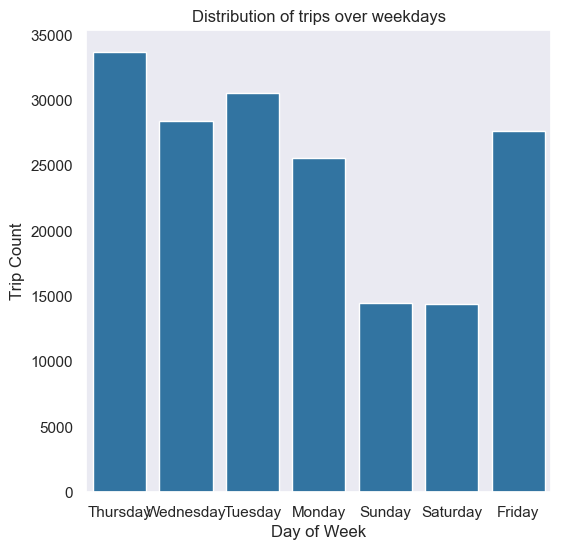

In [42]:
# plot
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(data=gobike, x='start_dayofweek', color=base_color)
plt.grid(False)
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title("Distribution of trips over weekdays");

## What is the distribution of users by age?

The bar chart below shows that:
1. The age distribution is unimodal and right skewed across both user types; indicating that most users are within the early-middle ages
2. Subscribers have a wider range of ages while Customers tends to have mostly younger users (with the peak age being around 30-31 years)

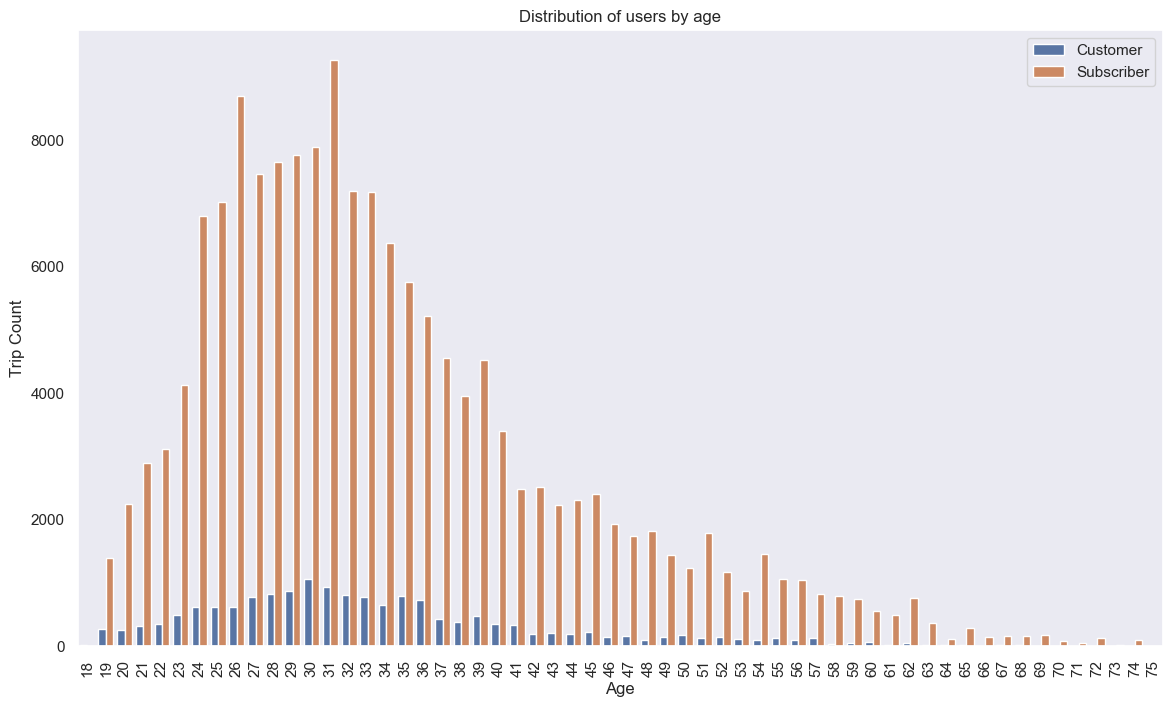

In [33]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.countplot(data = gobike, x = 'member_age', hue = 'user_type')
plt.grid(False)
plt.xlabel('Age')
plt.ylabel('Trip Count')
plt.title('Distribution of users by age')
plt.xticks(rotation=90)
plt.legend(loc='upper right');

## At what times of the day are the most or least trips taken?
1. We see the peak hours being 8am (which is genrally the times at which most people need to get to work), and 6pm (when most would return home from work)
2. There's very low usage in the wee hours of midnight to 5am

In [8]:
gobike["start_time"]=pd.to_datetime(gobike["start_time"], format='%Y-%m-%d %H:%M:%S')
gobike["end_time"]=pd.to_datetime(gobike["end_time"], format='%Y-%m-%d %H:%M:%S')
#set the hour variable
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', 
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
#convert to Index using specified date_format with dt.strftime
gobike['start_date'] = gobike.start_time.dt.strftime('%Y-%m-%d')
gobike['start_dayofweek'] = gobike.start_time.dt.strftime('%A')
gobike['start_hourofday'] = gobike.start_time.dt.strftime('%H')
gobike['start_hourofday'] = gobike['start_hourofday'].astype(hour_categ)

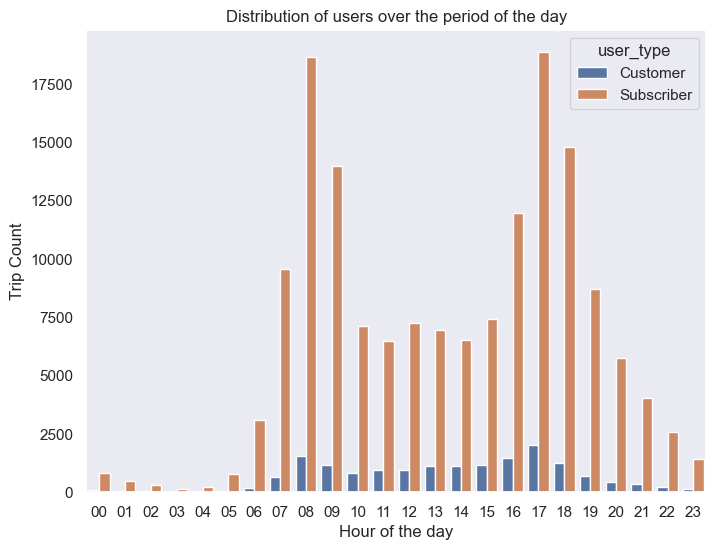

In [38]:
#plot
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(data=gobike, x='start_hourofday', hue='user_type')
plt.grid(False)
plt.xlabel('Hour of the day')
plt.ylabel('Trip Count')
plt.title("Distribution of users over the period of the day");

## What gender takes the longest trips?

Although, there are more men in the dataset, resulting in higher counts of trips taken:
1. the unspecified gender (who are customers) takes the longest trips, followed closely by female one-off riders
2. the same goes for subscribers

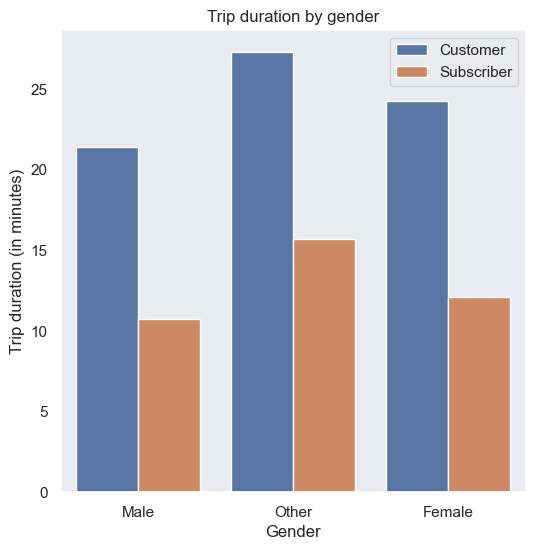

In [44]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.barplot(data=gobike, x='member_gender',y = "duration_minute", hue='user_type', ci=None)
plt.grid(False)
plt.ylabel('Trip duration (in minutes)')
plt.xlabel('Gender')
plt.title("Trip duration by gender")
plt.legend(loc='upper right');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [45]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBikes_slide_deck_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBikes_slide_deck_Part_II.ipynb to slides
[NbConvertApp] Writing 786257 bytes to Ford_GoBikes_slide_deck_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/bokelola/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/bokelola/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/bokelola/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/bokelola/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/Users/bokelola/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 541, in c

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
